# Proyecto final Parte I

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Predicción de enfermedades genéticas

En el siguiente dataset, se tiene información de pacientes pediatricos con diferentes enfermedades genéticas. Una efermedad genética es comúnmente causada por anomalías o mutaciones del ADN, es bien sabido que muchas de estas enfermedades son hereditarias o se dan debido a exposiciones a radiación, consumo de sustancias o una exposición ambiental fuerte. Debido a los elevados costos que conlleva realizar test de dichas enfermedades se quiere plantear la posibilidad de realizar un modelo predictivo haciendo uso de Machine Learning. Las variables de este dataset son en su mayoría categóricas, el dataset incluye datos demográficos del paciente, la información de antecedentes genéticas en sus padres, signos vitales, información relevante durante el embarazo y la enfermedad genética que se le ha diagnosticado. 

In [2]:
path = "C:/Users/USA/Downloads/"
file_name= "train_genetic_disorders"

#Leo el archivo con pandas
df = pd.read_csv(path + file_name + '.csv')
df=df.dropna(how="all")
fil3,col3=df.shape
fil3,col3


ruta="C:/Users/USA/Downloads/test_genetic_disorders.csv"
df2 = pd.read_csv(ruta)
df.equals(df2)

False

In [3]:
#Encabezado de mis datos

df.head()


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [4]:
#Quiero ver un porcentaje de mis valores nulos y definir si realmente los necesito 
df.isnull().mean().sort_values(ascending = False)

Family Name                                         0.439770
Mother's age                                        0.272143
Father's age                                        0.270763
Institute Name                                      0.231307
Maternal gene                                       0.128219
Symptom 2                                           0.100519
H/O substance abuse                                 0.099472
Test 5                                              0.098615
Follow-up                                           0.098520
Disorder Subclass                                   0.098425
History of anomalies in previous pregnancies        0.098329
Gender                                              0.098187
Respiratory Rate (breaths/min)                      0.097996
Birth asphyxia                                      0.097949
Symptom 1                                           0.097854
Symptom 5                                           0.097806
No. of previous abortion

In [5]:
df.select_dtypes(exclude = 'object').describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,19643.000000,21011.000000,15293.000000,15322.000000,18992.0,18958.0,18970.0,18962.0,18939.0,18957.000000,18965.000000,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000
mean,6.974851,4.899004,34.522527,41.942436,0.0,0.0,0.0,1.0,0.0,2.000106,7.484680,0.592034,0.552886,0.537405,0.497393,0.460804
std,4.322584,0.199829,9.847256,13.027701,0.0,0.0,0.0,0.0,0.0,1.411488,2.653633,0.491470,0.497208,0.498612,0.500006,0.498474
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.419026,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899548,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.473071,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033977,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.528684,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.select_dtypes(include = 'object').describe()


,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Patient First Name,Family Name,Father's name,Institute Name,Location of Institute,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
count,21011,21011,20724,18317,21011,21011,11771,21011,16151,21011,...,18998,18959,18964,18921,19007,18945,18959,18977,18962,18943
unique,21011,2,2,2,2,2480,6051,15777,27,26,...,2,2,4,4,2,2,2,4,3,9
top,PID0x6418,Yes,No,Yes,No,James,Smith,Sager,Not applicable,-,...,Yes,No,Not applicable,-,Yes,Yes,Singular,slightly abnormal,Mitochondrial genetic inheritance disorders,Leigh syndrome
freq,1,12509,12508,10125,11887,394,151,6,8011,10386,...,9625,9500,4807,4797,9555,9605,9509,4855,9686,4893


Text(0, 0.5, 'Porcentaje de NaN')

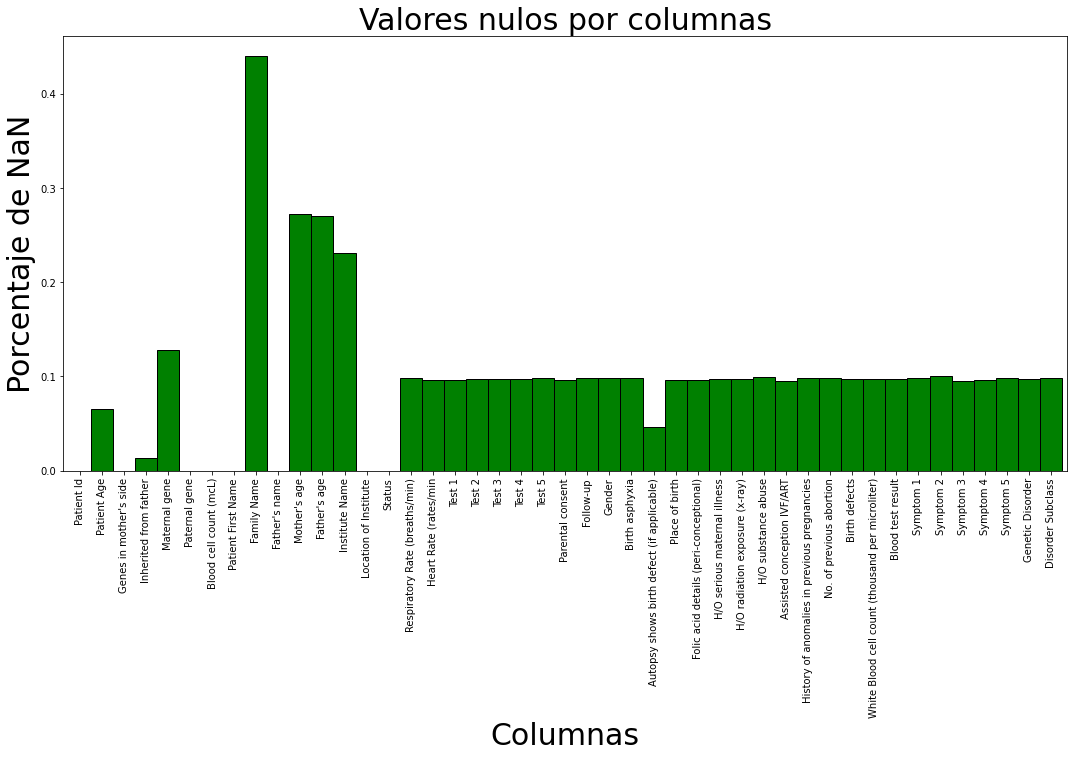

In [7]:
#Grafico valores nulos
nulos3 = df.isnull().mean()
axes = nulos3.plot.bar(title="Valores nulos por columnas",color="green",rot=90, width=1.0,figsize=(18,8),edgecolor = "black")
axes.title.set_size(30)
axes.set_xlabel("Columnas",fontsize=30)
axes.set_ylabel("Porcentaje de NaN",fontsize=30)


# Imputación de valores nulos

In [8]:
#En las varibles de test pareciera que hay varios varios nulos, quiero ver los valores que toman
tests = ['Test 1','Test 2','Test 3','Test 4','Test 5']
for col in tests:
    print(col)
    print(df[col].unique())
    print("\n")


Test 1
[ 0. nan]


Test 2
[nan  0.]


Test 3
[nan  0.]


Test 4
[ 1. nan]


Test 5
[ 0. nan]




In [9]:
 """
    df['Symptom 1']=df['Symptom 1'].fillna(-99)
    df['Symptom 2']=df['Symptom 2'].fillna(-99)
    df['Symptom 3']=df['Symptom 3'].fillna(-99)
    df['Symptom 4']=df['Symptom 4'].fillna(-99)
    df['Symptom 5']=df['Symptom 5'].fillna(-99)
    
        #Voy a cambiar los NaN de los test por -99
    df['Test 1']=df['Test 1'].fillna(-99)
    df['Test 2']=df['Test 2'].fillna(-99)
    df['Test 3']=df['Test 3'].fillna(-99)
    df['Test 4']=df['Test 4'].fillna(-99)
    df['Test 5']=df['Test 5'].fillna(-99)
    """
df = df.dropna(subset=['Genetic Disorder'])
df = df.dropna(subset=['Disorder Subclass'])


In [10]:

def filtro(df):
    
    imp_cat = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    

 
 
    df["Birth asphyxia"] = df["Birth asphyxia"].replace("No record",np.NaN)
    df["Birth asphyxia"] = df["Birth asphyxia"].replace("Not available",np.NaN)
    df["Birth asphyxia"].fillna(df["Birth asphyxia"].mode()[0], inplace=True)
    
    
    df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].replace("None",np.NaN)
    df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].replace("Not applicable",np.NaN)
    df["Autopsy shows birth defect (if applicable)"].fillna(df["Autopsy shows birth defect (if applicable)"].mode()[0], inplace=True)
    
    df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].replace("Not applicable",np.NaN)
    df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].replace("-",np.NaN)
    df["H/O radiation exposure (x-ray)"].fillna(df["H/O radiation exposure (x-ray)"].mode()[0], inplace=True)

    df["H/O substance abuse"] = df["H/O substance abuse"].replace("Not applicable",np.NaN)
    df["H/O substance abuse"] = df["H/O substance abuse"].replace("-",np.NaN)
    df["H/O substance abuse"].fillna(df["H/O substance abuse"].mode()[0], inplace=True)
    
    df["Mother's age"]=df["Mother's age"].fillna(int(df["Mother's age"].mean()))
    df["Father's age"]=df["Father's age"].fillna(int(df["Father's age"].mean()))
    df["Patient Age"]=df["Patient Age"].fillna(int(df["Patient Age"].mean()))
    
    
    #df["Disorder Subclass"].fillna(df["Disorder Subclass"].mode()[0], inplace=True)
    df["Inherited from father"].fillna( df["Inherited from father"].mode()[0], inplace=True)
    df["Maternal gene"].fillna( df["Maternal gene"].mode()[0], inplace=True)
    df["Respiratory Rate (breaths/min)"].fillna(df["Respiratory Rate (breaths/min)"].mode()[0], inplace=True)
    df["Heart Rate (rates/min"].fillna(df["Heart Rate (rates/min"].mode()[0], inplace=True)
    df["History of anomalies in previous pregnancies"].fillna(df["History of anomalies in previous pregnancies"].mode()[0], inplace=True)
    df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
    df["No. of previous abortion"].fillna(df["No. of previous abortion"].mode()[0], inplace=True)
    df["H/O serious maternal illness"].fillna(df["H/O serious maternal illness"].mode()[0], inplace=True)
    #df["Genetic Disorder"].fillna(df["Genetic Disorder"].mode()[0], inplace=True)
    df["White Blood cell count (thousand per microliter)"].fillna(df["White Blood cell count (thousand per microliter)"].mode()[0], inplace=True)
    df["Assisted conception IVF/ART"].fillna(df["Assisted conception IVF/ART"].mode()[0], inplace=True)

        

    
    
    imp_cat= imp_cat.fit(df[['Blood test result',"Folic acid details (peri-conceptional)",
                                                "H/O radiation exposure (x-ray)","H/O substance abuse",
                                                "Follow-up","Birth defects"]])
    
    df[['Blood test result',"Folic acid details (peri-conceptional)","H/O radiation exposure (x-ray)","H/O substance abuse","Follow-up","Birth defects"]]=imp_cat.transform(df[['Blood test result',"Folic acid details (peri-conceptional)","H/O radiation exposure (x-ray)","H/O substance abuse","Follow-up","Birth defects"]])
    #Quitar valores como "-"
    df['H/O radiation exposure (x-ray)']=df['H/O radiation exposure (x-ray)'].replace('-','others')
    df['H/O substance abuse']=df['H/O substance abuse'].replace('-','others')
    #Decidí sobre algunas columnas que deseo remover
    df.drop(columns = ["Institute Name","Location of Institute", "Family Name","Father's name","Parental consent",
                        "Patient First Name","Patient Id",'Place of birth'], inplace=True)
        
    df.dropna(subset=["Symptom 1","Symptom 2","Symptom 3","Symptom 4","Symptom 5","Test 1","Test 2","Test 3","Test 4","Test 5"],inplace=True)
        

filtro(df)   
    

In [11]:
df.isnull().mean().sort_values(ascending = False)

Patient Age                                         0.0
Autopsy shows birth defect (if applicable)          0.0
H/O serious maternal illness                        0.0
H/O radiation exposure (x-ray)                      0.0
H/O substance abuse                                 0.0
Assisted conception IVF/ART                         0.0
History of anomalies in previous pregnancies        0.0
No. of previous abortion                            0.0
Birth defects                                       0.0
White Blood cell count (thousand per microliter)    0.0
Blood test result                                   0.0
Symptom 1                                           0.0
Symptom 2                                           0.0
Symptom 3                                           0.0
Symptom 4                                           0.0
Symptom 5                                           0.0
Genetic Disorder                                    0.0
Folic acid details (peri-conceptional)          

In [37]:
df.shape

(8717, 37)

In [36]:
#Tengo dos posibles variables target
#df = df.dropna(subset= ['Genetic Disorder', 'Disorder Subclass'])
target1 = df['Genetic Disorder']
target2 = df['Disorder Subclass']
print(f"target 1 : {target1.unique()}")
print("\n")
print(f"target 2 : {target2.unique()}")


target 1 : ['Multifactorial genetic inheritance disorders', 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases']
Categories (3, object): ['Mitochondrial genetic inheritance disorders', 'Multifactorial genetic inheritance disorders', 'Single-gene inheritance diseases']


target 2 : ['Diabetes', 'Leigh syndrome', 'Cystic fibrosis', 'Mitochondrial myopathy', 'Hemochromatosis', 'Tay-Sachs', 'Leber's hereditary optic neuropathy', 'Cancer', 'Alzheimer's']
Categories (9, object): ['Alzheimer's', 'Cancer', 'Cystic fibrosis', 'Diabetes', ..., 'Leber's hereditary optic neuropathy', 'Leigh syndrome', 'Mitochondrial myopathy', 'Tay-Sachs']


A pesar de tener dos variables target, por temas de facilidad sería mejor tomar target 1 como el objetivo de predicción. 

In [14]:
a=df.groupby("Disorder Subclass")
a.mean()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
Disorder Subclass,,,,,,,,,,,,,,,,
Alzheimer's,6.630137,4.905558,35.164384,44.273973,0.0,0.0,0.0,1.0,0.0,2.219178,7.286256,0.876712,0.958904,0.958904,0.986301,1.000000
Cancer,7.000000,4.873314,33.547619,41.047619,0.0,0.0,0.0,1.0,0.0,1.952381,7.763426,0.214286,0.119048,0.095238,0.023810,0.023810
Cystic fibrosis,6.910995,4.906381,34.158377,41.484948,0.0,0.0,0.0,1.0,0.0,2.030105,7.298586,0.704188,0.698953,0.710079,0.722513,0.714660
Diabetes,6.782555,4.895523,34.574939,42.272727,0.0,0.0,0.0,1.0,0.0,1.974201,7.212701,0.775184,0.773956,0.821867,0.789926,0.839066
Hemochromatosis,6.935540,4.897137,34.719512,42.344948,0.0,0.0,0.0,1.0,0.0,1.947735,7.260228,0.385017,0.290941,0.249129,0.156794,0.108014
Leber's hereditary optic neuropathy,6.731884,4.924943,35.655797,41.311594,0.0,0.0,0.0,1.0,0.0,1.847826,7.496146,0.851449,0.873188,0.884058,0.916667,0.942029
Leigh syndrome,6.931346,4.906823,34.314363,41.827010,0.0,0.0,0.0,1.0,0.0,1.990063,7.296938,0.588076,0.551491,0.548780,0.488257,0.444896
Mitochondrial myopathy,6.934997,4.894469,34.778991,41.869475,0.0,0.0,0.0,1.0,0.0,2.028081,7.364072,0.537181,0.473739,0.426417,0.401976,0.317733
Tay-Sachs,6.996858,4.905810,34.448547,41.882954,0.0,0.0,0.0,1.0,0.0,1.999214,7.318540,0.468185,0.390416,0.348782,0.264729,0.208170


In [15]:
#Esta función la implementé para ver de a pares, ya que son muchos datos y queda una tabla muy grande
def correlation(x,y):
    x.unique()
    y.unique()
    crosstab = pd.crosstab(x, y)
    X2 = stats.chi2_contingency(crosstab, correction=False)[0]
    N = crosstab.sum().sum()
    k = x.nunique()
    r = y.nunique()
    V = np.sqrt((X2/N)/min(k-1,r-1))
    return V

correlation(df["Disorder Subclass"],df["Genetic Disorder"])

1.0

In [16]:

import association_metrics as am

df = df.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)


cramersv = am.CramersV(df) 
# La función de arriba me retorna una matriz cuadrada con los valores de Cramer's V
cramersv.fit()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,...,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Birth defects,Blood test result,Genetic Disorder,Disorder Subclass
Genes in mother's side,1.000000,0.010593,0.100072,0.025033,0.000152,0.002260,0.000161,0.021971,0.006970,0.002403,...,0.013682,0.000185,0.003581,0.009405,0.009340,0.007905,0.009478,0.028085,0.089217,0.197713
Inherited from father,0.010593,1.000000,0.012855,0.089575,0.014332,0.002418,0.013465,0.013919,0.004870,0.012897,...,0.002702,0.007116,0.010561,0.000118,0.005582,0.014601,0.000182,0.011749,0.096054,0.191852
Maternal gene,0.100072,0.012855,1.000000,0.012756,0.002873,0.005840,0.000539,0.003374,0.018472,0.011251,...,0.009166,0.004151,0.010216,0.011999,0.004203,0.019455,0.006463,0.025092,0.079104,0.184930
Paternal gene,0.025033,0.089575,0.012756,1.000000,0.025293,0.001956,0.001921,0.010403,0.016291,0.011985,...,0.003195,0.001044,0.004069,0.004306,0.000397,0.004439,0.006078,0.010225,0.067564,0.169152
Status,0.000152,0.014332,0.002873,0.025293,1.000000,0.000422,0.010380,0.008024,0.026729,0.000161,...,0.013089,0.007811,0.011702,0.001224,0.005715,0.007606,0.002307,0.024057,0.027626,0.042030
Respiratory Rate (breaths/min),0.002260,0.002418,0.005840,0.001956,0.000422,1.000000,0.010602,0.000728,0.021078,0.017349,...,0.005944,0.008470,0.002397,0.002881,0.008155,0.029608,0.012286,0.013391,0.011286,0.030536
Heart Rate (rates/min,0.000161,0.013465,0.000539,0.001921,0.010380,0.010602,1.000000,0.000010,0.014576,0.003428,...,0.008432,0.001180,0.011153,0.000348,0.000763,0.014559,0.003580,0.015576,0.008907,0.038121
Follow-up,0.021971,0.013919,0.003374,0.010403,0.008024,0.000728,0.000010,1.000000,0.014813,0.014557,...,0.001624,0.018023,0.011471,0.005400,0.035580,0.007626,0.011269,0.003483,0.014693,0.022497
Gender,0.006970,0.004870,0.018472,0.016291,0.026729,0.021078,0.014576,0.014813,1.000000,0.018928,...,0.020623,0.035085,0.008126,0.007809,0.011334,0.010068,0.012608,0.024557,0.015644,0.035635
Birth asphyxia,0.002403,0.012897,0.011251,0.011985,0.000161,0.017349,0.003428,0.014557,0.018928,1.000000,...,0.010415,0.002227,0.010058,0.011979,0.010316,0.009042,0.002549,0.015456,0.009379,0.034745


In [17]:
data = df.reset_index(drop=True)

In [18]:


def encode(data):
    encoder = data.copy()
    Encode_Func = LabelEncoder()

    encoder["Maternal gene"] = Encode_Func.fit_transform(encoder["Maternal gene"])
    encoder["Genes in mother's side"] = Encode_Func.fit_transform(encoder["Genes in mother's side"])
    encoder["Inherited from father"] = Encode_Func.fit_transform(encoder["Inherited from father"])
    encoder["Paternal gene"] = Encode_Func.fit_transform(encoder["Paternal gene"])
    encoder["Status"] = Encode_Func.fit_transform(encoder["Status"])
    encoder["Respiratory Rate (breaths/min)"] = Encode_Func.fit_transform(encoder["Respiratory Rate (breaths/min)"])
    encoder["Heart Rate (rates/min"] = Encode_Func.fit_transform(encoder["Heart Rate (rates/min"])
    encoder["Follow-up"] = Encode_Func.fit_transform(encoder["Follow-up"])
    encoder["Gender"] = Encode_Func.fit_transform(encoder["Gender"])

    encoder["Birth asphyxia"] = Encode_Func.fit_transform(encoder["Birth asphyxia"])
    encoder["Autopsy shows birth defect (if applicable)"] = Encode_Func.fit_transform(encoder["Autopsy shows birth defect (if applicable)"])
    encoder["Folic acid details (peri-conceptional)"] = Encode_Func.fit_transform(encoder["Folic acid details (peri-conceptional)"])

    encoder["H/O serious maternal illness"] = Encode_Func.fit_transform(encoder["H/O serious maternal illness"])
    encoder["H/O radiation exposure (x-ray)"] = Encode_Func.fit_transform(encoder["H/O radiation exposure (x-ray)"])
    encoder["H/O substance abuse"] = Encode_Func.fit_transform(encoder["H/O substance abuse"])

    encoder["Assisted conception IVF/ART"] = Encode_Func.fit_transform(encoder["Assisted conception IVF/ART"])
    encoder["History of anomalies in previous pregnancies"] = Encode_Func.fit_transform(encoder["History of anomalies in previous pregnancies"])
    encoder["Birth defects"] = Encode_Func.fit_transform(encoder["Birth defects"])
    encoder["Blood test result"] = Encode_Func.fit_transform(encoder["Blood test result"])
    encoder["Genetic Disorder"] = Encode_Func.fit_transform(encoder["Genetic Disorder"])
    encoder["Disorder Subclass"] = Encode_Func.fit_transform(encoder["Disorder Subclass"])

    return encoder
encoder=encode(data)
encoder.shape

(8717, 37)

In [19]:
encoder=encoder.astype("float32")
encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8717 entries, 0 to 8716
Data columns (total 37 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       8717 non-null   float32
 1   Genes in mother's side                            8717 non-null   float32
 2   Inherited from father                             8717 non-null   float32
 3   Maternal gene                                     8717 non-null   float32
 4   Paternal gene                                     8717 non-null   float32
 5   Blood cell count (mcL)                            8717 non-null   float32
 6   Mother's age                                      8717 non-null   float32
 7   Father's age                                      8717 non-null   float32
 8   Status                                            8717 non-null   float32
 9   Respiratory Rate (b

In [20]:
encoder.shape
train=encoder
train["Genetic Disorder"].unique()

array([1., 0., 2.], dtype=float32)

# Split

In [21]:
#Por ahora voy a hacer solo el Genetic disorder ya que son menos variables
X=train.drop(["Genetic Disorder","Disorder Subclass"],axis=1)
y=train["Genetic Disorder"]
y.unique()

array([1., 0., 2.], dtype=float32)

In [22]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
print("X TRAIN SHAPE: ",X_train.shape)
print("X TEST SHAPE: ",X_test.shape)
print("Y TRAIN SHAPE: ",y_train.shape)
print("Y TEST SHAPE: ",y_test.shape)


X TRAIN SHAPE:  (6973, 35)
X TEST SHAPE:  (1744, 35)
Y TRAIN SHAPE:  (6973,)
Y TEST SHAPE:  (1744,)


# Predicción con Logistic Regression, KNN y Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver="liblinear").fit(X_train,y_train)
knn = KNeighborsClassifier().fit(X_train,y_train)
arbol = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)


#Ahora las predicciones 
lrpre=lr.predict(X_test)
knnpre=knn.predict(X_test)
arbolpre=arbol.predict(X_test)
#Recordar que y_test son los datos realesss


# Métricas

In [24]:
#Ahora algunas métricas 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

a=accuracy_score(y_test,lrpre)
b=accuracy_score(y_test,knnpre)
c=accuracy_score(y_test,arbolpre)
print("Usando Accuracy Score las métricas fueron de: ")
print("-Logistic Regresion: {:.3f}".format(a))
print("-KNN: {:.3f}".format(b))
print("-Tree Decision: {:.3f}".format(c))

Usando Accuracy Score las métricas fueron de: 
-Logistic Regresion: 0.517
-KNN: 0.448
-Tree Decision: 0.511


De lo anterior podemos notar que de acuerdo a la métrica de accuracy el mejor modelo es el árbol de decisión 

In [25]:
a,b,c=recall_score(y_test,lrpre,average=None)
d,e,f=recall_score(y_test,knnpre,average=None)
g,h,i=recall_score(y_test,arbolpre,average=None)
print("Usando Recall Score (True positive rate) las métricas fueron de: ")
print("-Logistic Regresion: {:.3f},{:.3f},{:.3f}".format(a,b,c))
print("-KNN: {:.3f},{:.3f},{:.3f}".format(d,e,f))
print("-Tree Decision: {:.3f},{:.3f},{:.3f}".format(g,h,i))

Usando Recall Score (True positive rate) las métricas fueron de: 
-Logistic Regresion: 0.941,0.318,0.032
-KNN: 0.670,0.072,0.274
-Tree Decision: 0.583,0.256,0.493


In [26]:

a,b,c=recall_score(y_test, lrpre, pos_label= 0,average=None)
d,e,f=recall_score(y_test, knnpre, pos_label= 0,average=None)
g,h,i=recall_score(y_test, arbolpre, pos_label= 0,average=None)
print("Usando Recall Score (True negative rate) las métricas fueron de: ")
print("-Logistic Regresion: {:.3f},{:.3f},{:.3f}".format(a,b,c))
print("-KNN: {:.3f},{:.3f},{:.3f}".format(d,e,f))
print("-Tree Decision: {:.3f},{:.3f},{:.3f}".format(g,h,i))

Usando Recall Score (True negative rate) las métricas fueron de: 
-Logistic Regresion: 0.941,0.318,0.032
-KNN: 0.670,0.072,0.274
-Tree Decision: 0.583,0.256,0.493


C:\Users\USA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
C:\Users\USA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
C:\Users\USA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1375: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


De lo anterior podemos evidenciar que no tenemos un modelo desbalanceado puesto que ambos Recall tanto para TP y FP tenemos los mismos resultados. 

In [27]:
print("               Resumen de Logistic regression")
print(metrics.classification_report(y_test, lrpre, digits=3))

               Resumen de Logistic regression
              precision    recall  f1-score   support

         0.0      0.516     0.941     0.667       869
         1.0      0.585     0.318     0.412       195
         2.0      0.407     0.032     0.060       680

    accuracy                          0.517      1744
   macro avg      0.503     0.431     0.380      1744
weighted avg      0.482     0.517     0.402      1744



In [28]:
print("               Resumen de KNN")
print(metrics.classification_report(y_test, knnpre, digits=3))


               Resumen de KNN
              precision    recall  f1-score   support

         0.0      0.495     0.670     0.569       869
         1.0      0.177     0.072     0.102       195
         2.0      0.380     0.274     0.318       680

    accuracy                          0.448      1744
   macro avg      0.351     0.338     0.330      1744
weighted avg      0.415     0.448     0.419      1744



In [29]:
print("               Resumen de Tree decision")
print(metrics.classification_report(y_test, arbolpre, digits=3))

               Resumen de Tree decision
              precision    recall  f1-score   support

         0.0      0.601     0.583     0.592       869
         1.0      0.312     0.256     0.282       195
         2.0      0.453     0.493     0.472       680

    accuracy                          0.511      1744
   macro avg      0.455     0.444     0.448      1744
weighted avg      0.511     0.511     0.510      1744



In [30]:

cm=confusion_matrix(y_test,lrpre)
cm

array([[818,  21,  30],
       [131,  62,   2],
       [635,  23,  22]], dtype=int64)

<Figure size 432x288 with 0 Axes>

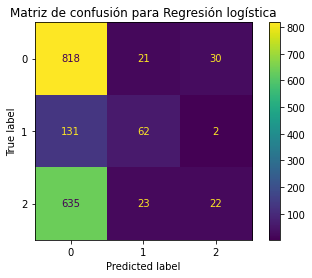

In [31]:
plt.figure()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Matriz de confusión para Regresión logística")
plt.show()

In [32]:

cm2=confusion_matrix(y_test,knnpre)
cm2

array([[582,  34, 253],
       [130,  14,  51],
       [463,  31, 186]], dtype=int64)

<Figure size 432x288 with 0 Axes>

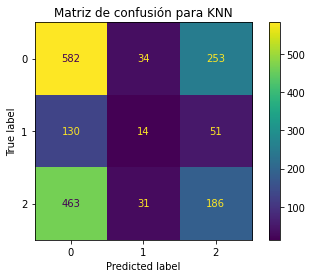

In [33]:
plt.figure()

cm2_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2)
cm2_display.plot()
plt.title("Matriz de confusión para KNN")
plt.show()

In [34]:
cm3=confusion_matrix(y_test,arbolpre)
cm3

array([[507,  48, 314],
       [ 54,  50,  91],
       [283,  62, 335]], dtype=int64)

<Figure size 432x288 with 0 Axes>

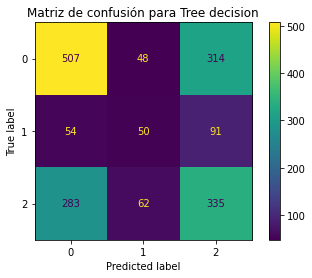

In [35]:
plt.figure()

cm3_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3)
cm3_display.plot()
plt.title("Matriz de confusión para Tree decision")
plt.show()

Viendo los resultados de los modelos luego de hacer las correcciones respecto a las imputaciones es evidente que no se tiene un modelo confiable, puede ser debido a los datos ya que no hay mucha información (respecto a los tests y symptoms).